In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_aer import Aer
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cnot(0, 1)
circuit.x(0)
circuit.draw(output='mpl')

AttributeError: 'QuantumCircuit' object has no attribute 'cnot'

In [3]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

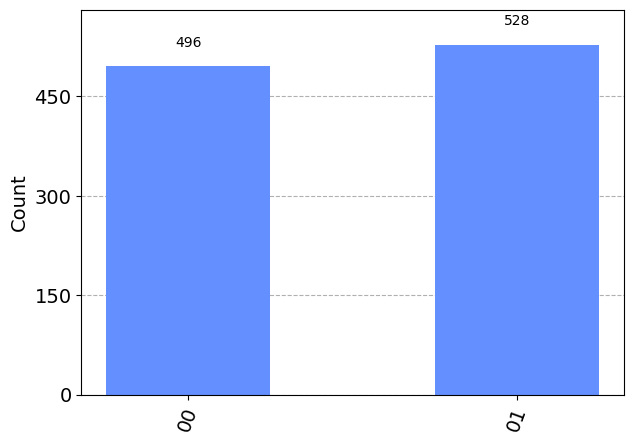

In [3]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, backend=simulator).result()
plot_histogram(result.get_counts())